# Esteban Ocon

<img src="https://www.formula1.com/content/fom-website/en/drivers/esteban-ocon/_jcr_content/image.img.1920.medium.jpg/1641815774959.jpg" width="300">

### Team: Alpine

<img src ="https://www.formula1.com/content/fom-website/en/drivers/esteban-ocon/_jcr_content/helmet.img.png/1617101189029.png" width="200">


In [51]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

In [52]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [53]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

oco_laps <- lap_data %>%
            filter(driverId == 839)

# Season Analysis

In [54]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
971,57
1045,57
990,56
1052,55


`geom_smooth()` using formula 'y ~ x'



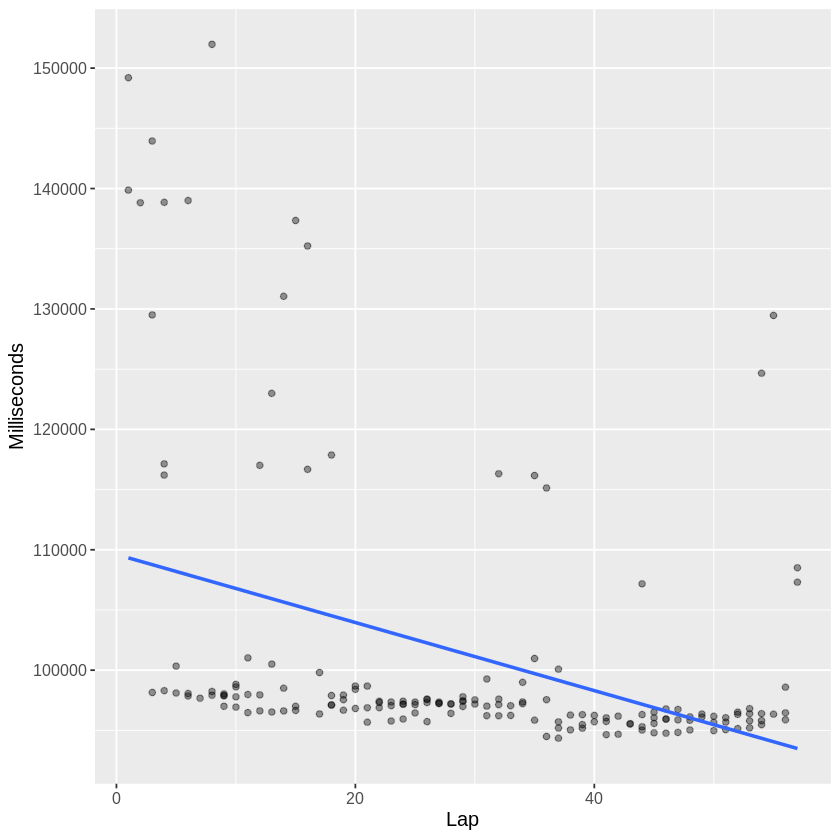

In [55]:
set.seed(2022)

#1. Bahrain

eo_bahrain <- oco_laps %>%
                filter(raceId %in% bahrain_race_ID) 

eo_bahrain_clean <- eo_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
eo_bahrain_clean
eo_bahrain_clean_ID <- eo_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_bahrain_races <- oco_laps %>%
                    filter(raceId %in% eo_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1054,66
1042,65


`geom_smooth()` using formula 'y ~ x'



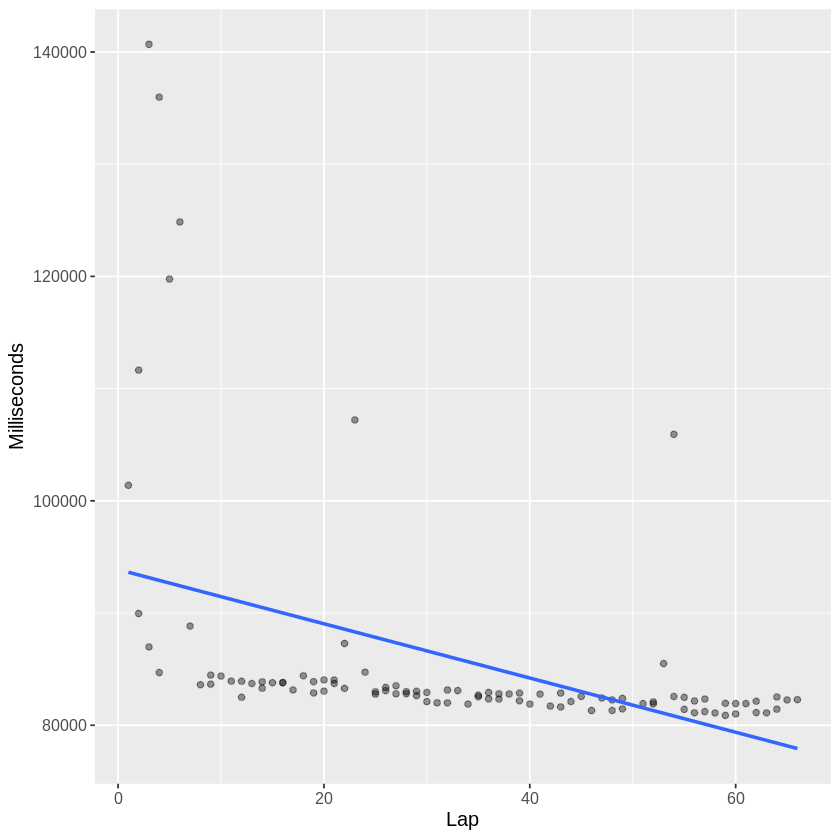

In [56]:
set.seed(2022)

#2. Portimão

eo_Portimão <- oco_laps %>%
                filter(raceId %in% Portimão_race_ID) 

eo_Portimão_eoean <- eo_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_Portimão_eoean
eo_Portimão_eoean_ID <- eo_Portimão_eoean %>%
                        pull(raceId)


### SPLITTING DATA

eo_Portimão_races <- oco_laps %>%
                    filter(raceId %in% eo_Portimão_eoean_ID)

formulaone_split <- initial_split(eo_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
989,58
969,56


`geom_smooth()` using formula 'y ~ x'



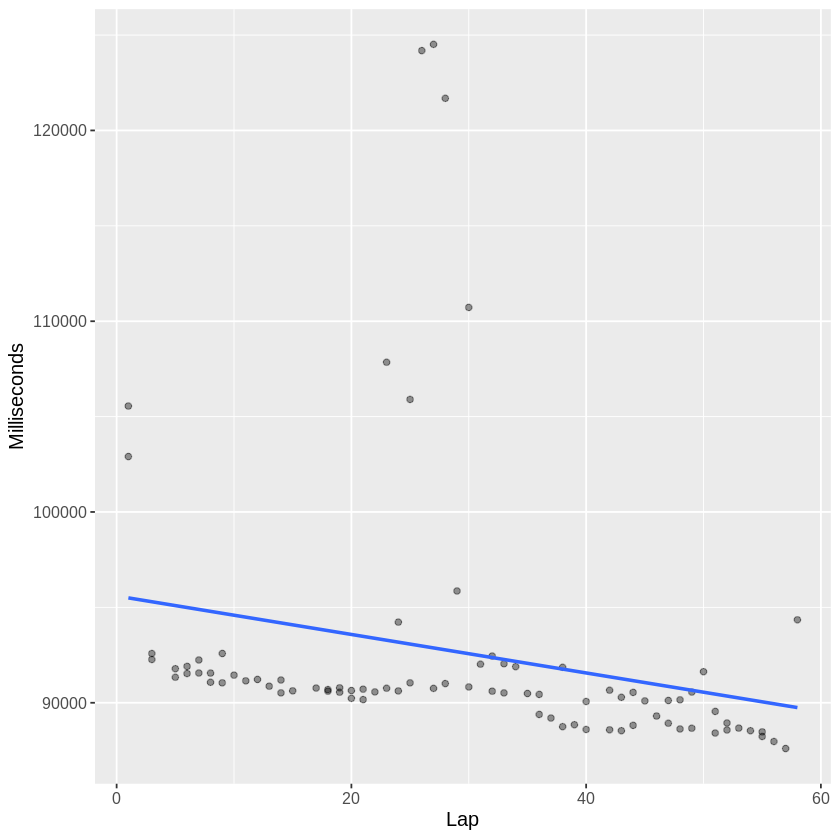

In [57]:
set.seed(2022)

#3. Australia

eo_aus <- oco_laps %>%
                filter(raceId %in% aus_race_ID) 

eo_aus_clean <- eo_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_aus_clean
eo_aus_clean_ID <- eo_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_aus_races <- oco_laps %>%
                    filter(raceId %in% eo_aus_clean_ID)

formulaone_split <- initial_split(eo_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1053,63
1043,27


`geom_smooth()` using formula 'y ~ x'



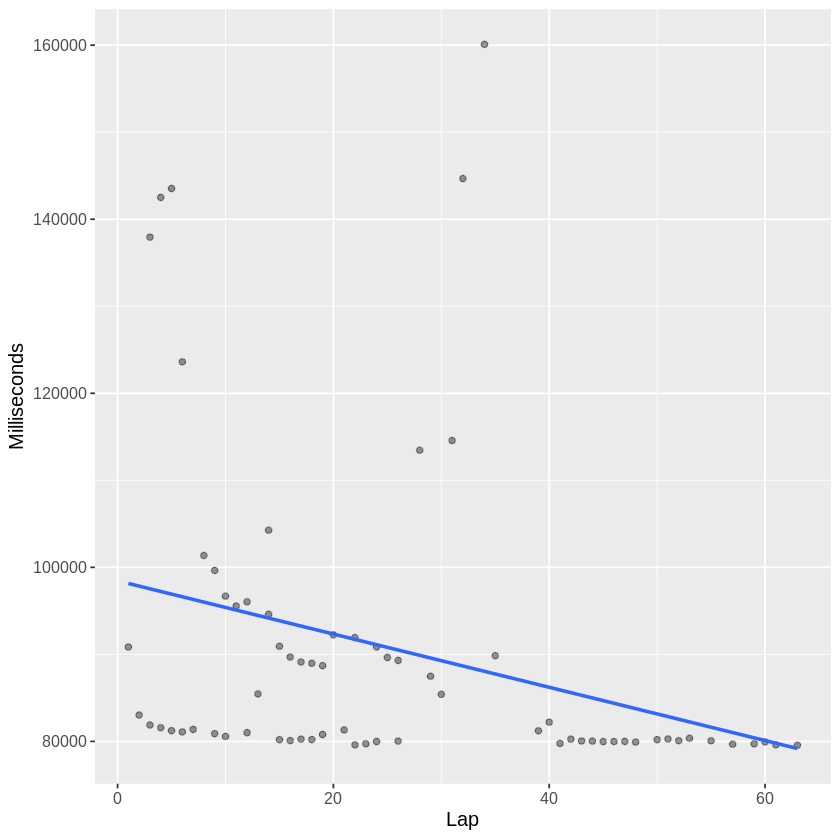

In [58]:
set.seed(2022)

#4. Italy, Imola

eo_imola <- oco_laps %>%
                filter(raceId %in% imola_race_ID) 

eo_imola_clean <- eo_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_imola_clean
eo_imola_clean_ID <- eo_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_imola_races <- oco_laps %>%
                    filter(raceId %in% eo_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1044,57
1067,57


`geom_smooth()` using formula 'y ~ x'



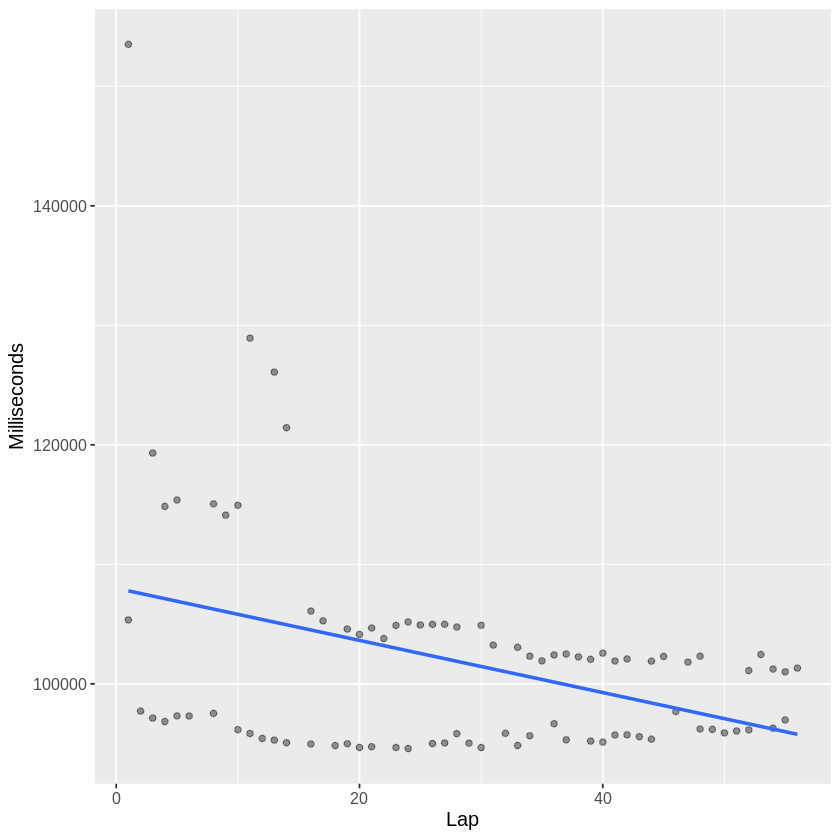

In [59]:
set.seed(2022)

#5. Turkey (Replacing Miami)

eo_turkey <- oco_laps %>%
                filter(raceId %in% turkey_race_ID) 

eo_turkey_clean <- eo_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_turkey_clean
eo_turkey_clean_ID <- eo_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_turkey_races <- oco_laps %>%
                    filter(raceId %in% eo_turkey_clean_ID) 

formulaone_split <- initial_split(eo_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
973,65
1036,65
1055,65
993,38


`geom_smooth()` using formula 'y ~ x'



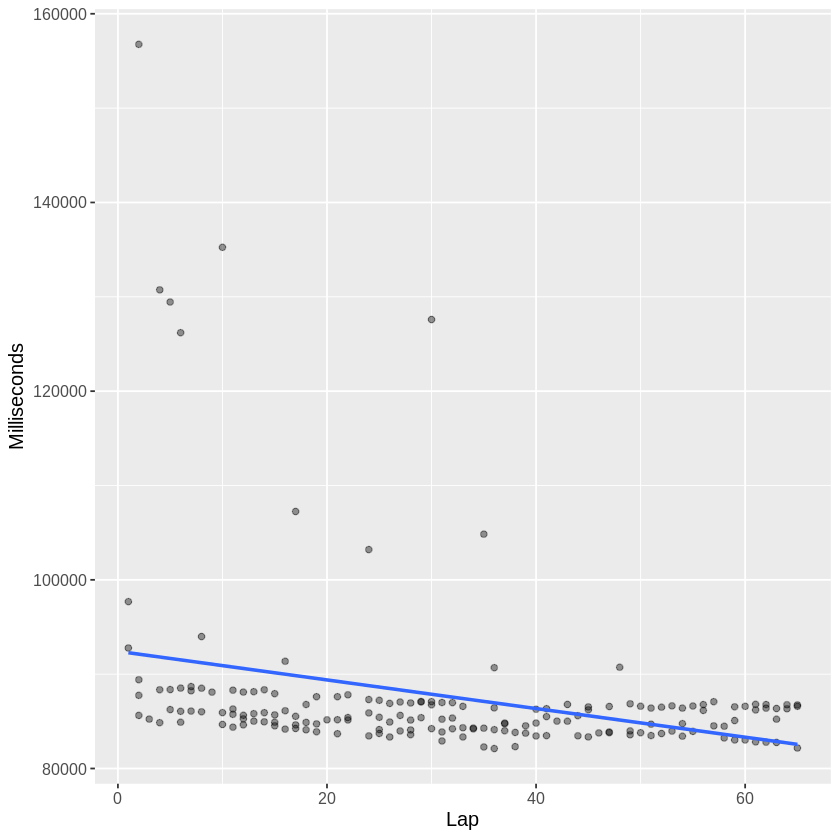

In [60]:
set.seed(2022)

#6. Spain

eo_spain <- oco_laps %>%
                filter(raceId %in% spain_race_ID) 

eo_spain_clean <- eo_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_spain_clean
eo_spain_clean_ID <- eo_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_spain_races <- oco_laps %>%
                    filter(raceId %in% eo_spain_clean_ID)

formulaone_split <- initial_split(eo_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
974,78
994,78
1056,77


`geom_smooth()` using formula 'y ~ x'



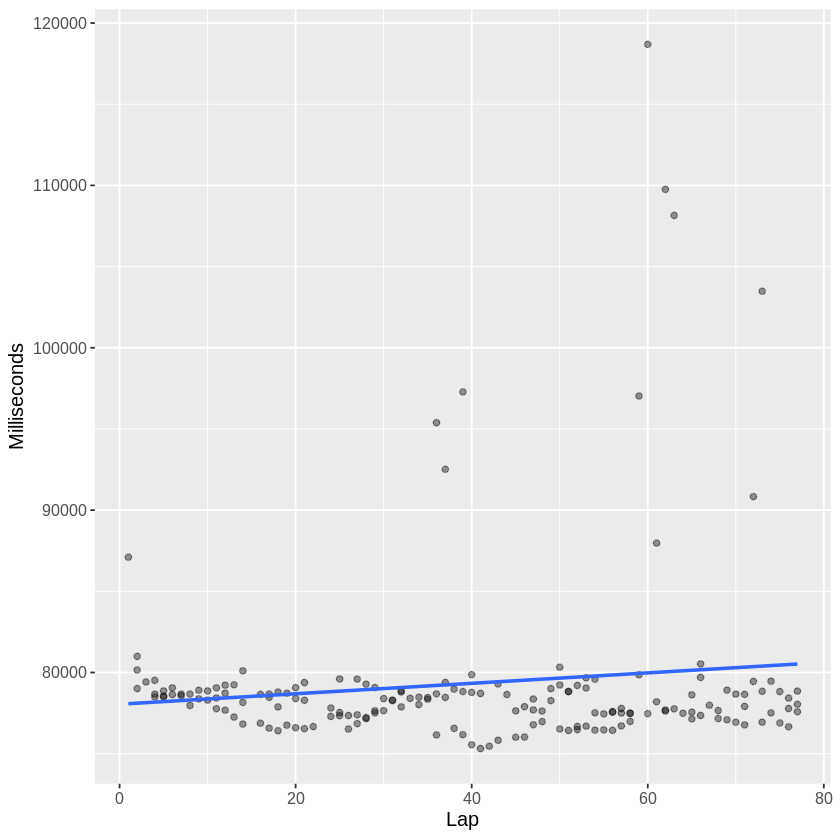

In [61]:
set.seed(2022)

#7. Monaco

eo_monaco <- oco_laps %>%
                filter(raceId %in% monaco_race_ID) 

eo_monaco_clean <- eo_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_monaco_clean
eo_monaco_clean_ID <- eo_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_monaco_races <- oco_laps %>%
                    filter(raceId %in% eo_monaco_clean_ID)

formulaone_split <- initial_split(eo_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
976,51
1057,3


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



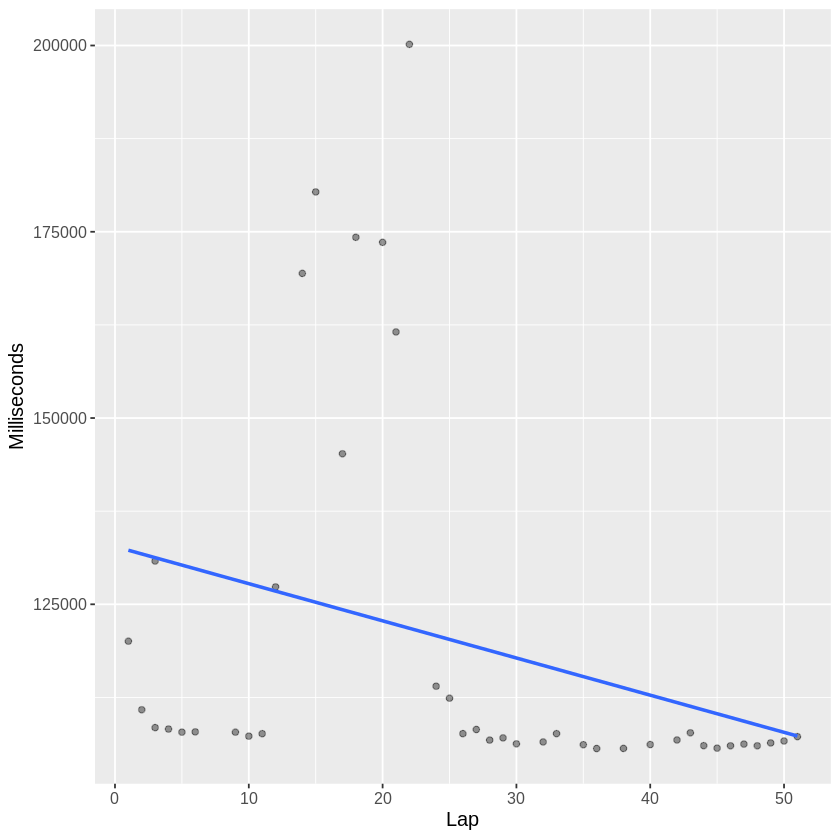

In [62]:
set.seed(2022)

#8. Azerbaijan

eo_azerbaijan <- oco_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

eo_azerbaijan_clean <- eo_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_azerbaijan_clean
eo_azerbaijan_clean_ID <- eo_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_azerbaijan_races <- oco_laps %>%
                    filter(raceId %in% eo_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
975,70
995,67


`geom_smooth()` using formula 'y ~ x'



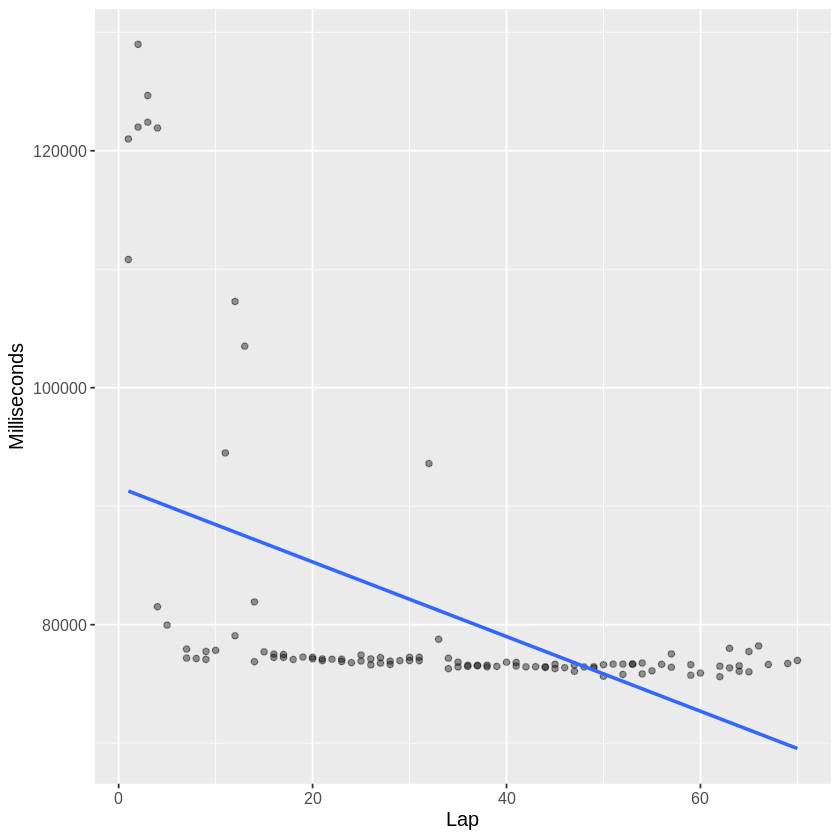

In [63]:
set.seed(2022)

#9. Canada

eo_canada <- oco_laps %>%
                filter(raceId %in% canada_race_ID) 

eo_canada_clean <- eo_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_canada_clean
eo_canada_clean_ID <- eo_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_canada_races <- oco_laps %>%
                    filter(raceId %in% eo_canada_clean_ID)

formulaone_split <- initial_split(eo_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



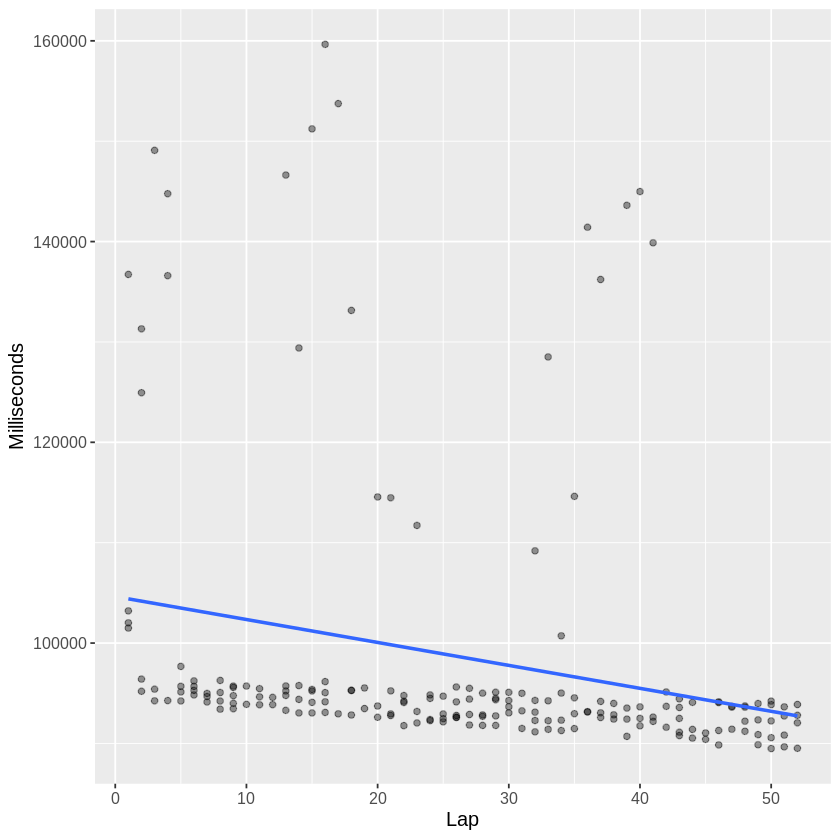

In [64]:
set.seed(2022)

#10. Great Britain

eo_uk <- oco_laps %>%
                filter(raceId %in% uk_race_ID) 

eo_uk_clean <- eo_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_uk_clean_ID <- eo_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_uk_races <- oco_laps %>%
                    filter(raceId %in% eo_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



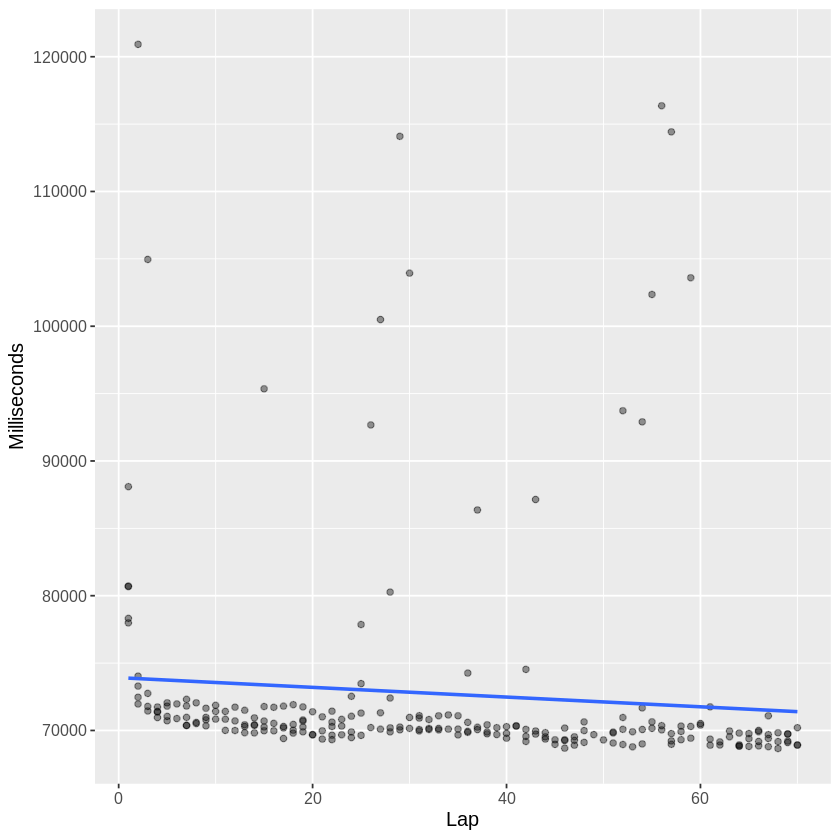

In [65]:
set.seed(2022)

#11. Austria

eo_austria <- oco_laps %>%
                filter(raceId %in% austria_race_ID) 

eo_austria_clean <- eo_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_austria_clean_ID <- eo_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_austria_races <- oco_laps %>%
                    filter(raceId %in% eo_austria_clean_ID)

formulaone_split <- initial_split(eo_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



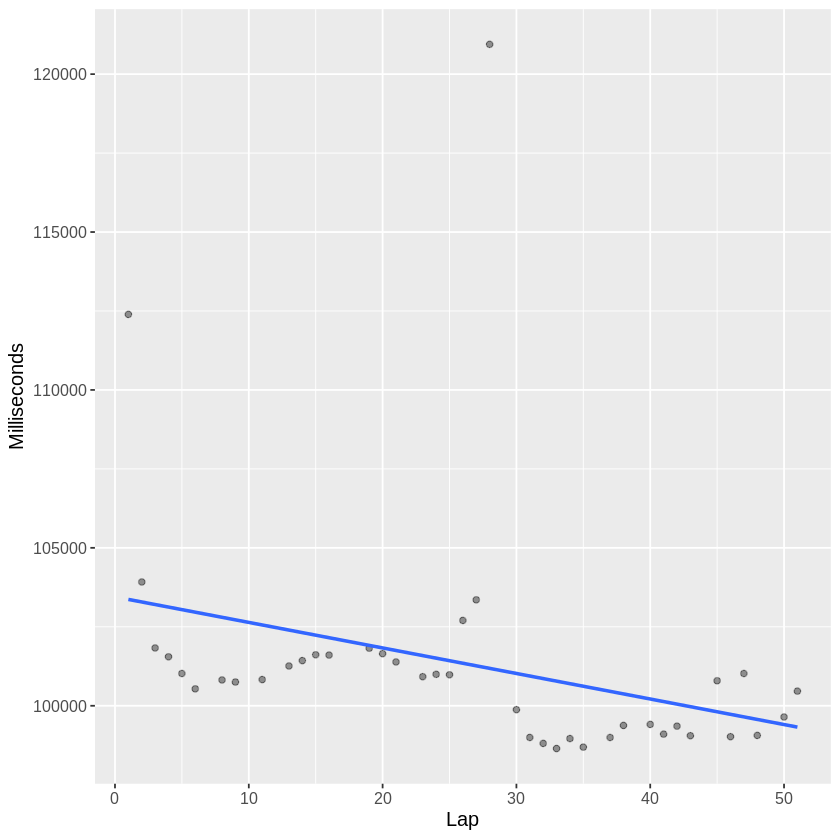

In [66]:
set.seed(2022)

#12. France

eo_france <- oco_laps %>%
                filter(raceId %in% france_race_ID) 

eo_france_clean <- eo_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_france_clean
eo_france_clean_ID <- eo_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_france_races <- oco_laps %>%
                    filter(raceId %in% eo_france_clean_ID) 

formulaone_split <- initial_split(eo_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



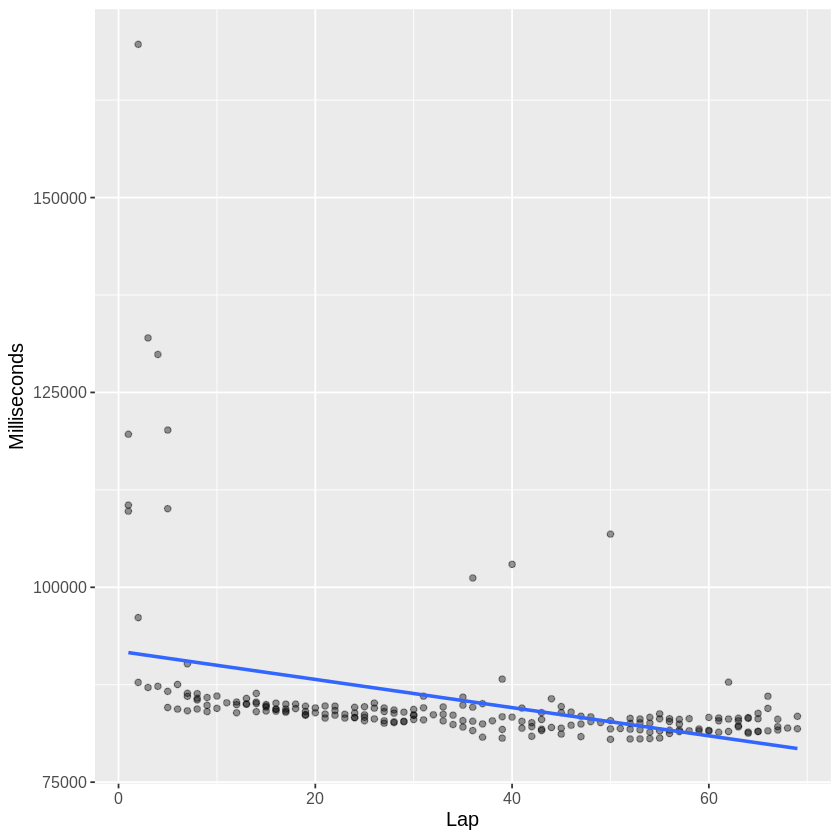

In [67]:
set.seed(2022)

#13. Hungary

eo_hungary <- oco_laps %>%
                filter(raceId %in% hungary_race_ID) 

eo_hungary_clean <- eo_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

eo_hungary_clean_ID <- eo_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_hungary_races <- oco_laps %>%
                    filter(raceId %in% eo_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
980,44
1001,44
1037,44
960,43
1063,1


`geom_smooth()` using formula 'y ~ x'



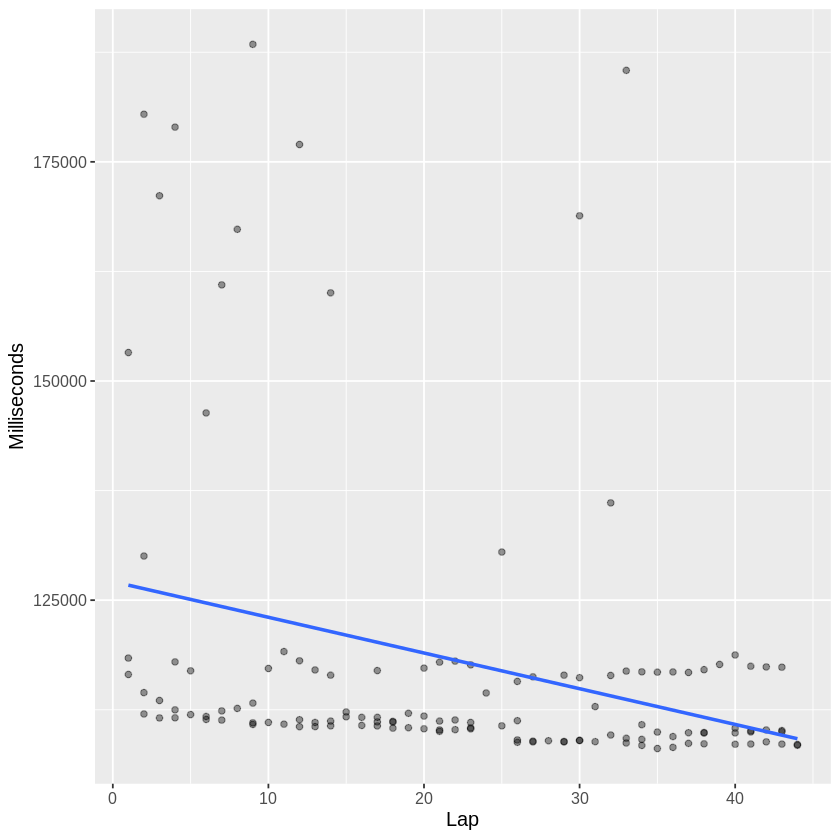

In [68]:
set.seed(2022)

#14. Belgium

eo_belgium <- oco_laps %>%
                filter(raceId %in% belgium_race_ID) 

eo_belgium_clean <- eo_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_belgium_clean
eo_belgium_clean_ID <- eo_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_belgium_races <- oco_laps %>%
                    filter(raceId %in% eo_belgium_clean_ID)

formulaone_split <- initial_split(eo_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



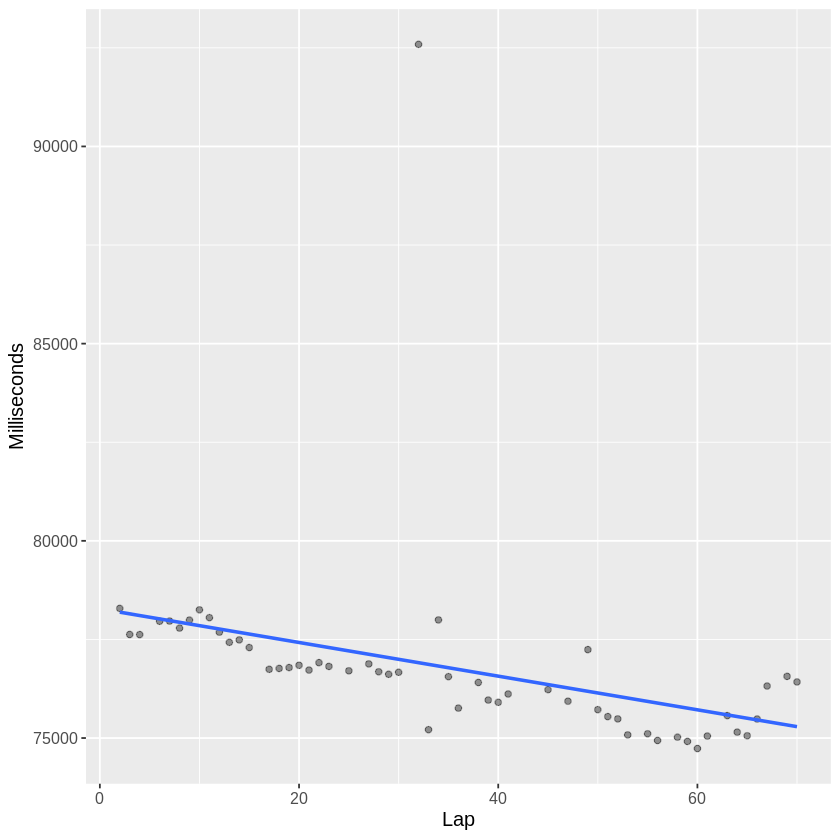

In [69]:
set.seed(2022)

#15. Netherlands

eo_netherlands <- oco_laps %>%
                filter(raceId %in% netherlands_race_ID) 

eo_netherlands_clean <- eo_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_netherlands_clean_ID <- eo_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_netherlands_races <- oco_laps %>%
                    filter(raceId %in% eo_netherlands_clean_ID)

formulaone_split <- initial_split(eo_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



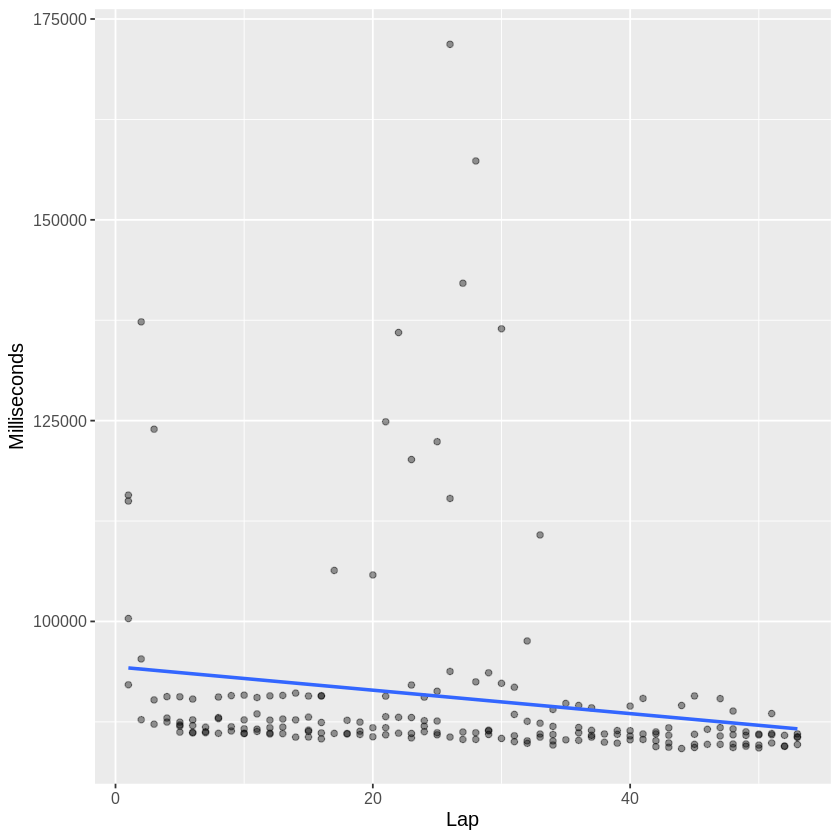

In [70]:
set.seed(2022)

#16. Italy, Monza

eo_monza <- oco_laps %>%
                filter(raceId %in% monza_race_ID) 

eo_monza_clean <- eo_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

eo_monza_clean_ID <- eo_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_monza_races <- oco_laps %>%
                    filter(raceId %in% eo_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



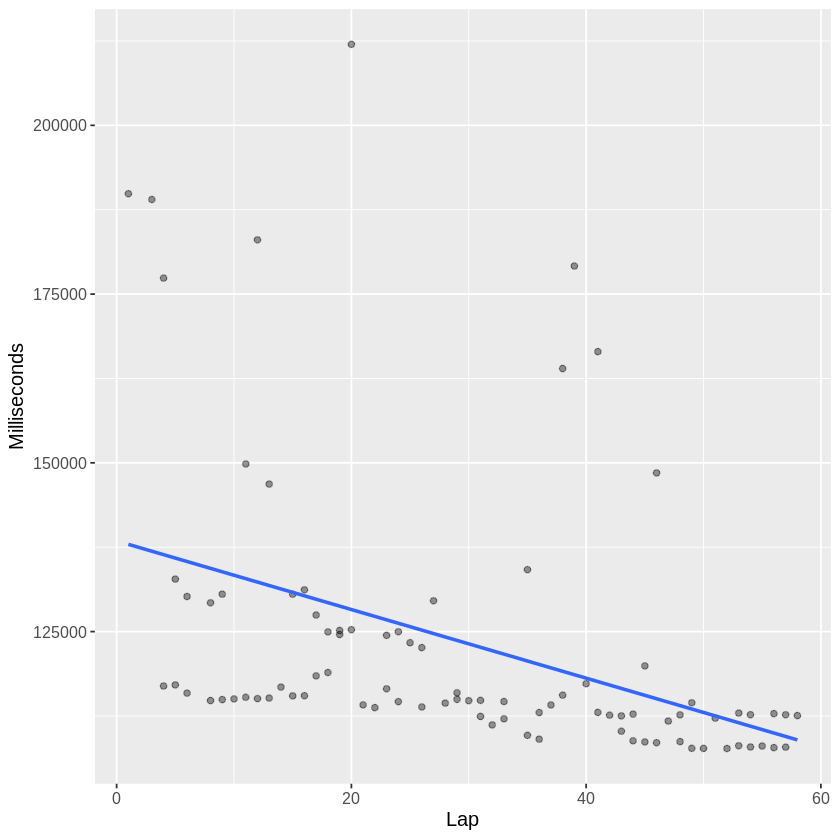

In [71]:
set.seed(2022)

#17. Singapore

eo_singapore <- oco_laps %>%
                filter(raceId %in% singapore_race_ID) 

eo_singapore_clean <- eo_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_singapore_clean_ID <- eo_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_singapore_races <- oco_laps %>%
                    filter(raceId %in% eo_singapore_clean_ID)

formulaone_split <- initial_split(eo_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



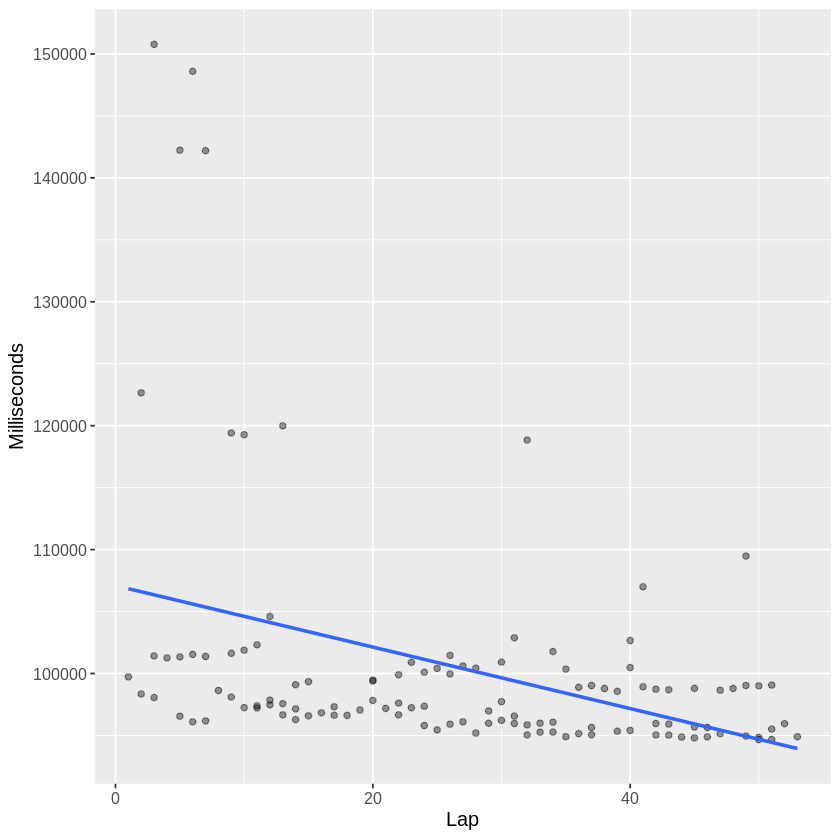

In [72]:
set.seed(2022)

#18. Japan

eo_japan <- oco_laps %>%
                filter(raceId %in% japan_race_ID) 

eo_japan_clean <- eo_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_japan_clean_ID <- eo_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_japan_races <- oco_laps %>%
                    filter(raceId %in% eo_japan_clean_ID)

formulaone_split <- initial_split(eo_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



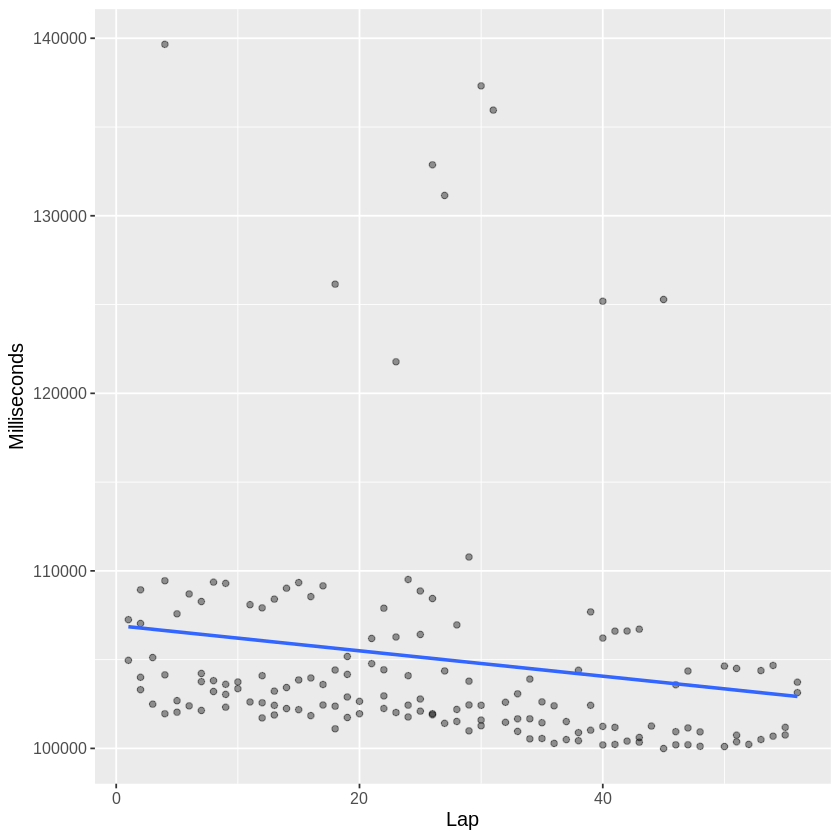

In [73]:
set.seed(2022)

#19. USA, Austin

eo_austin <- oco_laps %>%
                filter(raceId %in% austin_race_ID) 

eo_austin_clean <- eo_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_austin_clean_ID <- eo_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_austin_races <- oco_laps %>%
                    filter(raceId %in% eo_austin_clean_ID)

formulaone_split <- initial_split(eo_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



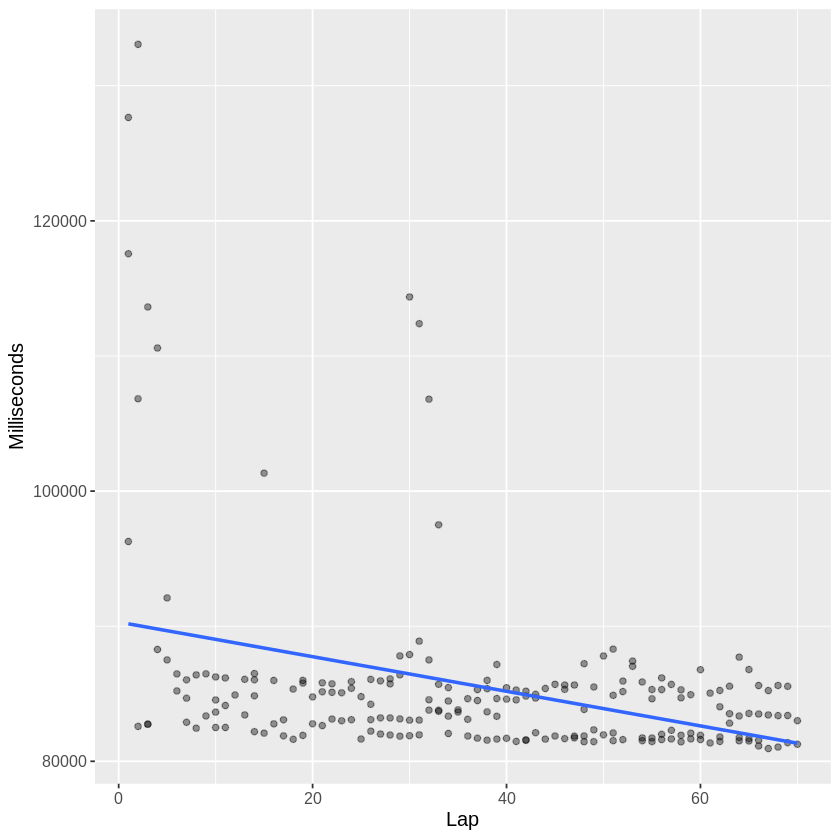

In [74]:
set.seed(2022)

#20. Mexico

eo_mexico <- oco_laps %>%
                filter(raceId %in% mexico_race_ID) 

eo_mexico_clean <- eo_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_mexico_clean_ID <- eo_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_mexico_races <- oco_laps %>%
                    filter(raceId %in% eo_mexico_clean_ID)

formulaone_split <- initial_split(eo_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



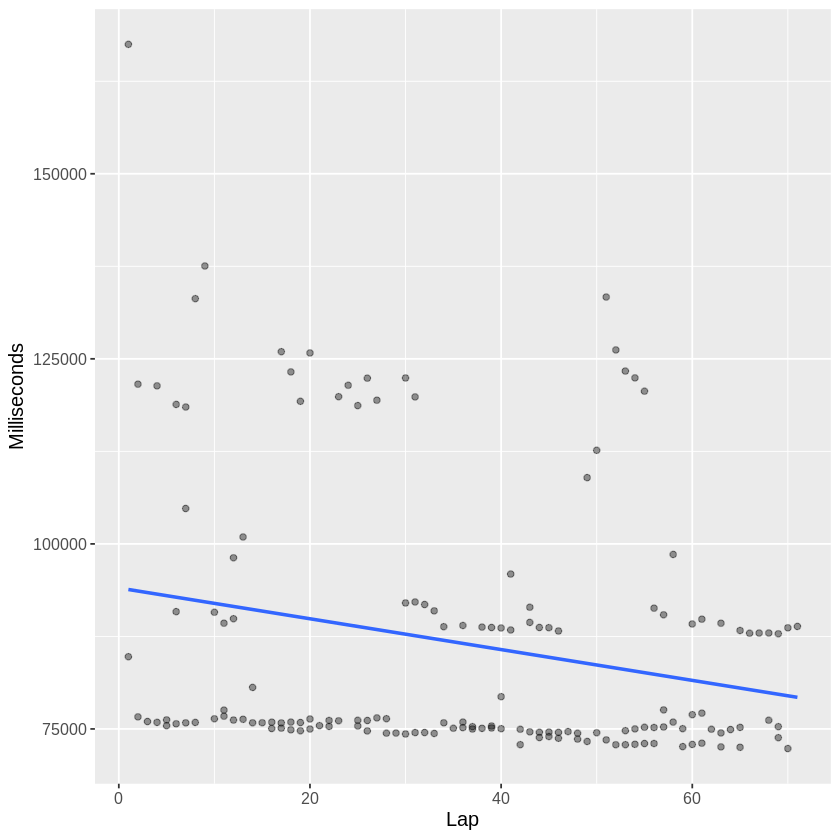

In [75]:
set.seed(2022)

#21. Brazil

eo_brazil <- oco_laps %>%
                filter(raceId %in% brazil_race_ID) 

eo_brazil_clean <- eo_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

eo_brazil_clean_ID <- eo_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_brazil_races <- oco_laps %>%
                    filter(raceId %in% eo_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(eo_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
988,55
1047,55
968,54
1009,44


`geom_smooth()` using formula 'y ~ x'



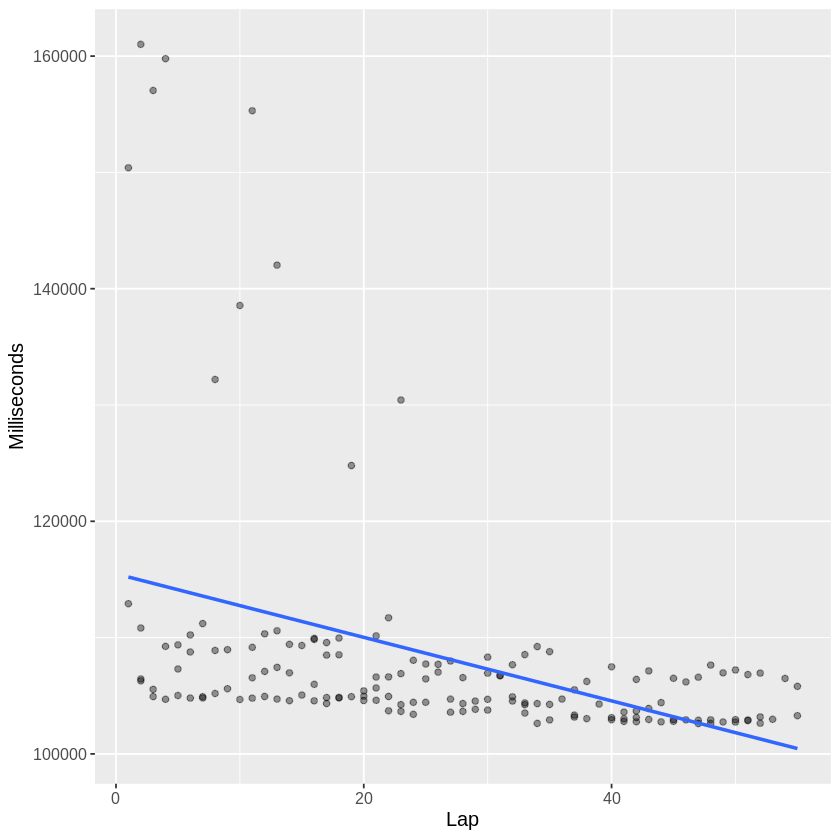

In [76]:
set.seed(2022)

#22. Abu Dhabi

eo_uae <- oco_laps %>%
                filter(raceId %in% uae_race_ID) 

eo_uae_clean <- eo_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
eo_uae_clean
eo_uae_clean_ID <- eo_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

eo_uae_races <- oco_laps %>%
                    filter(raceId %in% eo_uae_clean_ID)

formulaone_split <- initial_split(eo_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [77]:
rmse_col
racetime_col

write_csv(rmse_col, "final_rmse_data/eo_rmse.csv")
write_csv(racetime_col, "final_race_data/eo_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,13029.862,1
rmse,standard,4682.086,2
rmse,standard,6972.116,3
rmse,standard,15780.140,4
rmse,standard,8325.232,5
rmse,standard,11797.399,6
rmse,standard,4850.069,7
rmse,standard,22265.825,8
rmse,standard,6704.478,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5780363,96.33938,1.605656,1
5661498,94.35829,1.572638,2
5372077,89.53461,1.492244,3
5585750,93.09584,1.551597,4
5795065,96.58442,1.609740,5
5764436,96.07393,1.601232,6
6186664,103.11106,1.718518,7
6109101,101.81835,1.696973,8
5628985,93.81641,1.563607,9
